Wordclouds may not be everyone's favourite and are not a great way to represent data but I kinda find them intriguing so I decided to make one for known "target" genes for various antineoplastic drugs from this representative database I found on https://www.anticancerfund.org/database-cancer-drugs

In [1]:
import pandas as pd


ex= pd.read_excel("C:/Users/sansk/Downloads/cancerdrugsdb.xlsx", sheet_name="Sheet1")


ex.head()

#this column has all the known target genes for cancer drugs from a database 

,CCND2; KRAS; CDK4; CDK6; NRAS; PIK3CA; CDKN2A; ESR1; BRAF; SMARCA4; CCND3; ERBB2; CCND1; PGR; TP53; ESR2
0,CYP17A1; CHEK2; PTEN; CDK12; TSPYL1; ATM; SRD5...
1,BTK; TP53
2,CSF2; SMN1; TOP2A
3,KRAS
4,ERBB2; EGFR; ERBB4; PIK3CA; ROS1; EML4; ERBB3;...


In [2]:
#i am attempting to combine all the genes in one single string so i can clean it further to make a wordcloud
geness = ex.iloc[:,0].astype(str)

gene_str = "; ".join(geness)

print(gene_str)


CYP17A1; CHEK2; PTEN; CDK12; TSPYL1; ATM; SRD5A1; SRD5A2; PALB2; SRD5A3; BRIP1; APC; DSE; TP53; YBX1; FANCA; AR; BTK; TP53; CSF2; SMN1; TOP2A; KRAS; ERBB2; EGFR; ERBB4; PIK3CA; ROS1; EML4; ERBB3; PTEN; NRG1; BRAF; KRAS; ALK; VEGFB; PIGF; PGF; VEGFC; VEGFA; IL2RB; IL2RA; IL2; IL2RG; CD40; EPCAM; RET; ALK; ROS1; BRAF; TP53; EML4; CD52; TP53; CXCL12; CD34; RXRB; RARG; ERBB2; RARB; RXRA; CETP; VDR; CCR2; SFTPA1; RXRG; P2RY2; SERPINE1; EHMT2; CGA; RARA; PIK3C3; PIK3R4; PIK3R3; MAP2K1; PIK3CA; ERBB2; PIK3R1; RB1; SGK1; HRAS; PIK3R5; PIK3R6; ESR1; BRAF; FGFR3; PIK3CG; PTEN; CDK4; PIK3CB; ARID1A; PIK3C2A; PIK3C2B; ESR2; PI4KA; FGFR1; NRAS; MTOR; FGFR2; PIK3CD; PIK3C2G; TP53; PIK3R2; CYP1A2; BCL2; EGFR; MET; TOP2A; TOP2A; MTOR; ATXN2; CYP1A2; CYP2C19; CYP2C9; BTF3P11; ATAD5; CYP3A4; CYP2D6; HSD17B10; CBX1; DRD1; EHMT2; TOP2B; CYP19A1; KMT2C; ESR1; ESR2; TNFSF11; PGR; TNFRSF11B; IGF2; ERBB2; CYP1B1; MAP4K4; TUBB1; DLG2; CSMD1; AR; FAS; SERPINE1; TXNRD2; CCND1; CDKN1A; IKBKB; FLT3; TXNRD1; FGFR1;

In [14]:
gene_list= gene_str.split("; ")
#print(gene_list)


#this is string i will pass on to make the wordcloud
gene_strn= " ".join(gene_list)
print(gene_strn)

CYP17A1 CHEK2 PTEN CDK12 TSPYL1 ATM SRD5A1 SRD5A2 PALB2 SRD5A3 BRIP1 APC DSE TP53 YBX1 FANCA AR BTK TP53 CSF2 SMN1 TOP2A KRAS ERBB2 EGFR ERBB4 PIK3CA ROS1 EML4 ERBB3 PTEN NRG1 BRAF KRAS ALK VEGFB PIGF PGF VEGFC VEGFA IL2RB IL2RA IL2 IL2RG CD40 EPCAM RET ALK ROS1 BRAF TP53 EML4 CD52 TP53 CXCL12 CD34 RXRB RARG ERBB2 RARB RXRA CETP VDR CCR2 SFTPA1 RXRG P2RY2 SERPINE1 EHMT2 CGA RARA PIK3C3 PIK3R4 PIK3R3 MAP2K1 PIK3CA ERBB2 PIK3R1 RB1 SGK1 HRAS PIK3R5 PIK3R6 ESR1 BRAF FGFR3 PIK3CG PTEN CDK4 PIK3CB ARID1A PIK3C2A PIK3C2B ESR2 PI4KA FGFR1 NRAS MTOR FGFR2 PIK3CD PIK3C2G TP53 PIK3R2 CYP1A2 BCL2 EGFR MET TOP2A TOP2A MTOR ATXN2 CYP1A2 CYP2C19 CYP2C9 BTF3P11 ATAD5 CYP3A4 CYP2D6 HSD17B10 CBX1 DRD1 EHMT2 TOP2B CYP19A1 KMT2C ESR1 ESR2 TNFSF11 PGR TNFRSF11B IGF2 ERBB2 CYP1B1 MAP4K4 TUBB1 DLG2 CSMD1 AR FAS SERPINE1 TXNRD2 CCND1 CDKN1A IKBKB FLT3 TXNRD1 FGFR1 HSPA4 IL6 EPO SMO MYCN TERT MAPK3 RARA BDNF JUN BIRC5 MT1A MAPK1 MAPK10 PML GSTO1 DNMT1 ABL1 ETV6 GRIA1 NFATC2 GATA3 PNPLA3 CPA2 HLA-DRB1 MTHFR LP

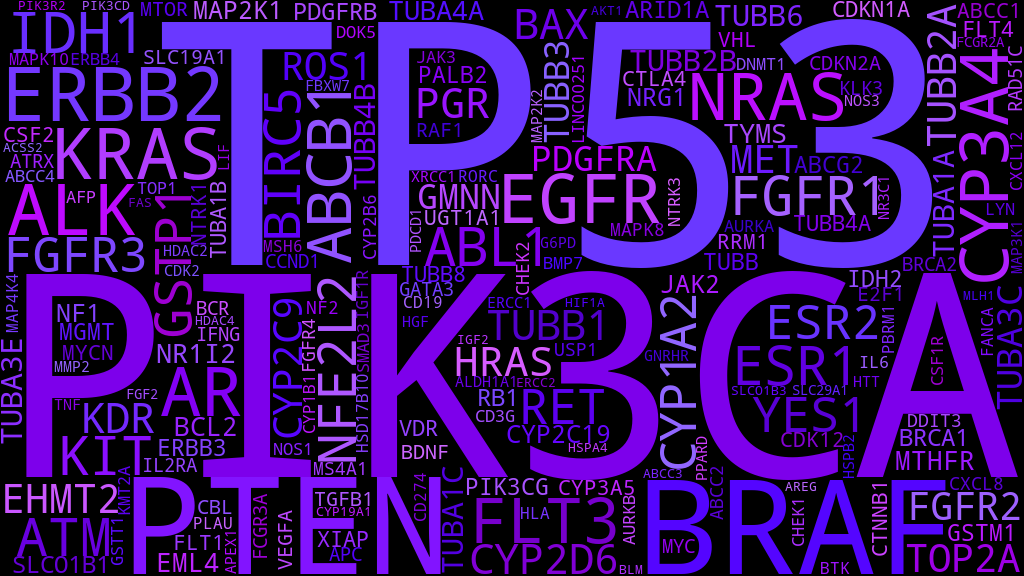

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
import random

#this is optional, i just wanted my wordcloud to be fancy but really no i read that a lavender ribbon symbolises awareness for all cancers or cancers as a whole so i wanted my wordcloud to be in lavender 
def lavender_color(word, font_size, position, orientation, random_state=None, **kwargs):
    hue = random.randint(265,280)
    return "hsl(%d, 100%%, %d%%)" % (hue, random.randint(50,70))


wc_genes= WordCloud(width=1024, height=576, background_color="black").generate(gene_strn)
wc_genes =wc_genes.recolor(color_func=lavender_color)

wc_genes.to_file('wc.png')
imgg= Image.open('wc.png')
display(imgg)

            #i didnt like how the pyplot output had a white border and also i couldn't fix it so what you see above is another way to visualize your wordcloud

# plt.figure(figsize=(10.24,5.76))
# plt.imshow(wc_genes, interpolation='bilinear', aspect="auto")
# plt.axis('off')  # Hide the axis
# plt.subplots_adjust(left=0,right=1, top=1, bottom=0)
# plt.show()